In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Part (a)

In [2]:
# part a download the data
df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name="Sheet1")
df.columns = ["T", "V", "AP", "RH", "EP"]  


Part (b)

In [9]:
#part b (i)
print('Rows in this data set : ', df.shape[0])
print('Columns in this data set : ', df.shape[1])
print("The rows represent hourly observations of the power plant's environmental and operational conditions between 2006 and 2011.")
print("The columns represent the following variables - Temperature(T), Ambient Pressure(AP), Relative Humidity(RH), Exhaust Vacuum(V), Energy Output(EP).")

Rows in this data set :  9568
Columns in this data set :  5
The rows represent hourly observations of the power plant's environmental and operational conditions between 2006 and 2011.
The columns represent the following variables - Temperature(T), Ambient Pressure(AP), Relative Humidity(RH), Exhaust Vacuum(V), Energy Output(EP).


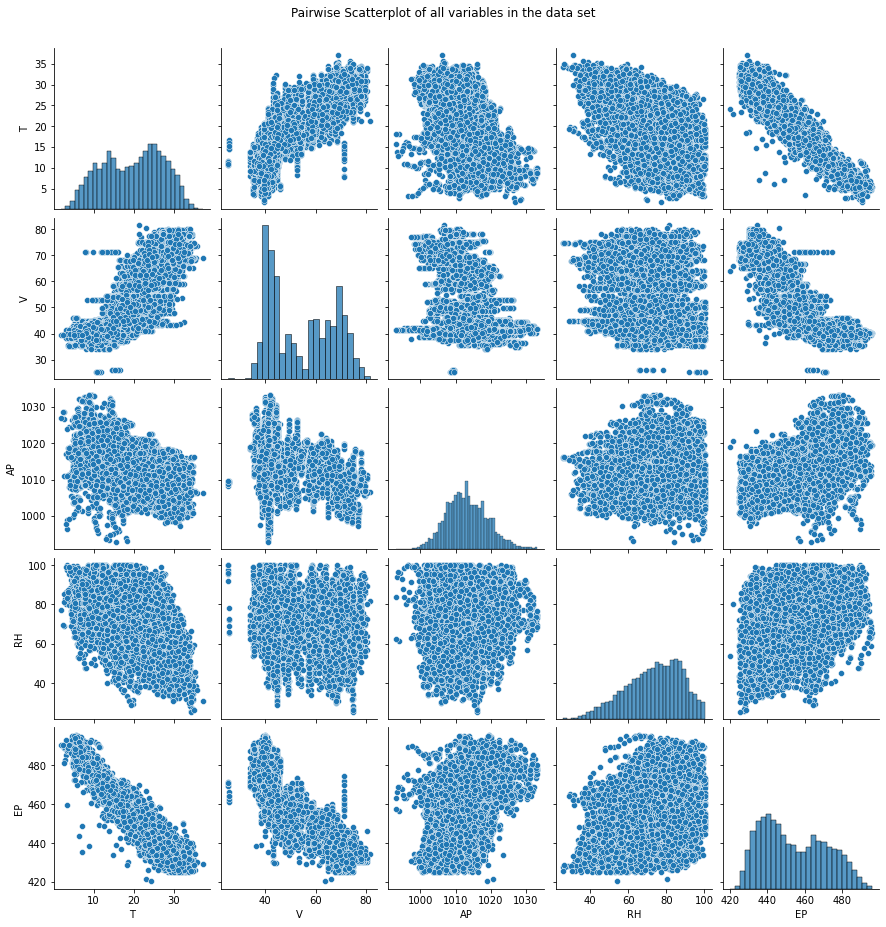

In [4]:
#part b (ii)
sns.pairplot(df, diag_kind="hist")
plt.suptitle("Pairwise Scatterplot of all variables in the data set", x = 0.5, y = 1.03) 
plt.show()

In [11]:
#part b (ii)
print("1. There is strong negative correlation between T (Temperature) and EP (Energy Output).")
print("2. There is strong negative correlation between V (Vacuum) and EP (Energy Output).")
print("3. There is Weak correlation between AP (Pressure) and EP (Energy Output).")
print("4. There is Moderate correlation between RH (Humidity) and EP (Energy Output)")

1. There is strong negative correlation between T (Temperature) and EP (Energy Output).
2. There is strong negative correlation between V (Vacuum) and EP (Energy Output).
3. There is Weak correlation between AP (Pressure) and EP (Energy Output).
4. There is Moderate correlation between RH (Humidity) and EP (Energy Output)


In [12]:
# part b (iii)
variables = ["T", "V", "AP", "RH", "EP"]
statistics = ["Mean", "Median", "Range", "First Quartile", "Third Quartile", "Interquartile Range"]

summary_table = pd.DataFrame({
    "Mean": df[variables].mean(),
    "Median": df[variables].median(),
    "Range": df[variables].max() - df[variables].min(),
    "First Quartile": df[variables].quantile(0.25),
    "Third Quartile": df[variables].quantile(0.75),
    "Interquartile Range": df[variables].quantile(0.75) - df[variables].quantile(0.25)
}).T

summary_table.columns = variables

print("Summary Statistics Table:")
print(summary_table)



Summary Statistics Table:
                             T          V           AP         RH          EP
Mean                 19.651231  54.305804  1013.259078  73.308978  454.365009
Median               20.345000  52.080000  1012.940000  74.975000  451.550000
Range                35.300000  56.200000    40.410000  74.600000   75.500000
First Quartile       13.510000  41.740000  1009.100000  63.327500  439.750000
Third Quartile       25.720000  66.540000  1017.260000  84.830000  468.430000
Interquartile Range  12.210000  24.800000     8.160000  21.502500   28.680000


Part (c)

In [13]:
#part c simple linear regression
X_columns = ["T", "V", "AP", "RH"] 
y = df["EP"] 

regression_results = {}
outliers_data = {}
simple_regression_coefs = {}
#Threshold for outliers
P_THRESH = 0.05

for col in X_columns:
    X = sm.add_constant(df[col])  
    model = sm.OLS(y, X).fit()  
    simple_regression_coefs[col] = model.params
    regression_results[col] = model.summary() 

  
    outliers = model.outlier_test()
    #find significant outliers
    outliers_idx = np.where(outliers.iloc[:, 2] < P_THRESH)[0] 

   
    outlier_values = np.vstack((df[col].iloc[outliers_idx], y.iloc[outliers_idx])).T
    outliers_data[col] = pd.DataFrame(outlier_values, columns=[col, "EP"])

for predictor, summary in regression_results.items():
    print(f"Regression Summary for {predictor}:\n")
    print(summary)
    print("\n" + "="*80 + "\n")


Regression Summary for T:

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:38:26   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341    

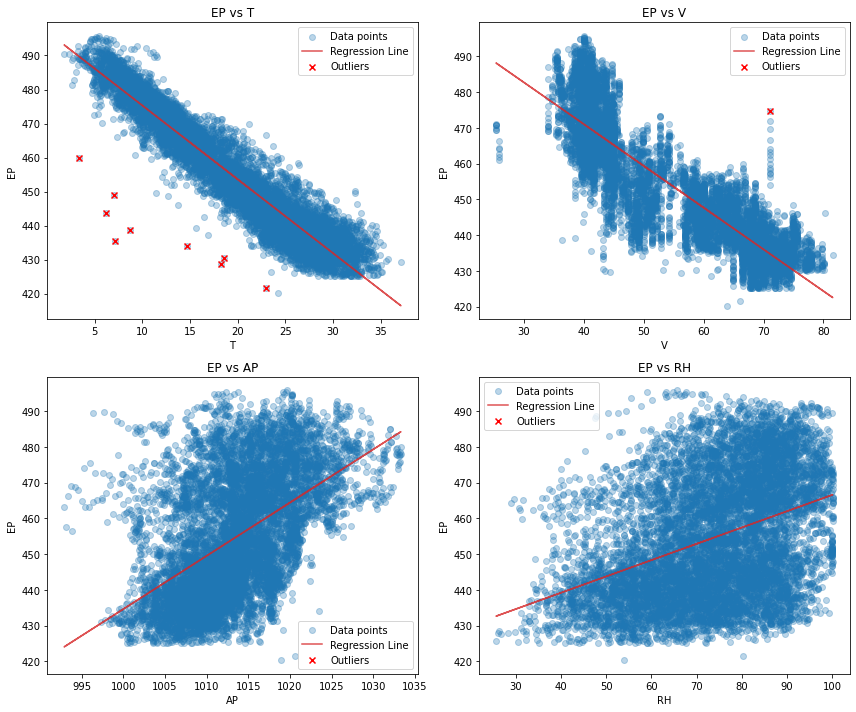

In [14]:
#part c plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(X_columns):
    row, col_idx = divmod(i, 2)
    ax = axes[row, col_idx]

    X = df[col] 
    y = df["EP"]

    ax.scatter(X, y, alpha=0.3, label="Data points")

    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    ax.plot(X, model.predict(X_with_const), "tab:red", alpha=0.8, label="Regression Line")
    ax.scatter(outliers_data[col][col], outliers_data[col]["EP"], color="red", label="Outliers", marker="x")

    ax.set_title(f"EP vs {col}")
    ax.set_xlabel(col)  
    ax.set_ylabel("EP")
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
#part c outliers
print("There are 9 outliers in EP vs T")
print("There is 1 outliers in EP vs V")
print("There is no outliers in EP vs AP")
print("There is no outliers in EP vs RH")

There are 9 outliers in EP vs T
There is 1 outliers in EP vs V
There is no outliers in EP vs AP
There is no outliers in EP vs RH


Part (d)

In [16]:
#part d Multiple Linear Regression (MLR)
X = df[["T", "V", "AP", "RH"]]
X = sm.add_constant(X)
y = df["EP"]

mlr_model = sm.OLS(y, X).fit()
mlr_coefficients = mlr_model.params[1:].values

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [17]:
print("The p-values for each predictor are very small (p < 0.05), which mean each predictor (T, V, AP, RH) is statistically significant.")
print("Therefore, we reject the null hypothesis for all predictors, meaning they are all statistically significant.")

The p-values for each predictor are very small (p < 0.05), which mean each predictor (T, V, AP, RH) is statistically significant.
Therefore, we reject the null hypothesis for all predictors, meaning they are all statistically significant.


Part (e)

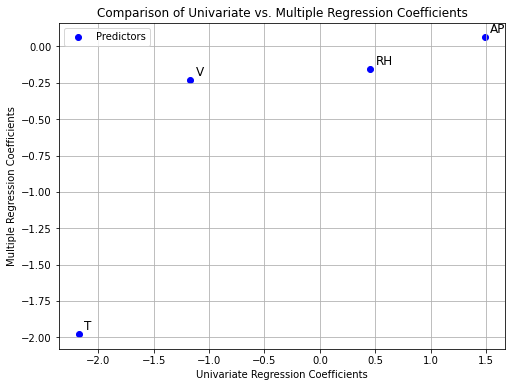

In [19]:
# univariate regression coefficients
univariate_regression_coefs_values = [simple_regression_coefs[col][1] for col in X.columns[1:]]  # Exclude intercept

# multiple regression coefficients
mlr_coefficients = mlr_model.params[1:].values

features = ["T", "V", "AP", "RH"]

plt.figure(figsize=(8, 6))
plt.scatter(univariate_regression_coefs_values, mlr_coefficients, color='blue', label="Predictors")

for i, txt in enumerate(features):
    plt.annotate(txt, (univariate_regression_coefs_values[i], mlr_coefficients[i]), fontsize=12, xytext=(5,5), textcoords="offset points")

plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate vs. Multiple Regression Coefficients")
plt.grid(True)
plt.legend()
plt.show()


part (f)

In [20]:
#part f : Polynomial regression results
poly_regression_results = {}

for col in ["T", "V", "AP", "RH"]:
    poly = PolynomialFeatures(degree=3, include_bias=True) 
    X_poly = poly.fit_transform(df[[col]])
    
    model = sm.OLS(y, X_poly).fit()
    poly_regression_results[col] = model.summary()

for predictor, summary in poly_regression_results.items():
    print(f"Polynomial Regression Summary for {predictor} (Including X, X², X³):\n")
    print(summary)
    print("\n" + "="*80 + "\n")


Polynomial Regression Summary for T (Including X, X², X³):

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:13:36   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [21]:
# part f
print("There is evidence of nonlinear association for T, AP, and RH because their quadratic and cubic terms are statistically significant")
print("For V, there is no strong evidence of nonlinearity since its higher-order terms are not significant (p > 0.05).")

There is evidence of nonlinear association for T, AP, and RH because their quadratic and cubic terms are statistically significant
For V, there is no strong evidence of nonlinearity since its higher-order terms are not significant (p > 0.05).


part (g)

In [23]:
#part g interaction terms
predictors = df[['T', 'V', 'AP', 'RH']]

poly = PolynomialFeatures(degree=2, interaction_only=True)
Xn = poly.fit_transform(predictors) 

names = poly.get_feature_names_out(predictors.columns)

Xdf = pd.DataFrame(data=Xn, columns=names)

Xdf = sm.add_constant(Xdf)

y = df["EP"]

interaction_model = sm.OLS(y, Xdf).fit()

print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 21 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:20:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

In [24]:
# part (g)
print("T vs V, T vs RH, and V vs AP are statistically significant interaction terms.")

T vs V, T vs RH, and V vs AP are statistically significant interaction terms.


part (h)

In [25]:
# part h 
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

X_train = train_df[['T', 'V', 'AP', 'RH']]
y_train = train_df['EP']
X_test = test_df[['T', 'V', 'AP', 'RH']]
y_test = test_df['EP']

# Multiple Linear Regression (MLR)
X_train_mlr = sm.add_constant(X_train)
X_test_mlr = sm.add_constant(X_test)

mlr_model = sm.OLS(y_train, X_train_mlr).fit()

# Interaction Terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test.columns))
X_train_poly_df = sm.add_constant(X_train_poly_df)
X_test_poly_df = sm.add_constant(X_test_poly_df)

# Reset indices to ensure alignment
X_train_poly_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Fit full model with all interactions & quadratic terms
full_model = sm.OLS(y_train, X_train_poly_df).fit()

# Remove insignificant variables using p-values
significant_vars = full_model.pvalues[full_model.pvalues < 0.05].index
X_train_poly_sig = X_train_poly_df[significant_vars]
X_test_poly_sig = X_test_poly_df[significant_vars]

# Fit the reduced model
reduced_model = sm.OLS(y_train, X_train_poly_sig).fit()

y_pred_mlr = mlr_model.predict(X_test_mlr)
y_pred_reduced = reduced_model.predict(X_test_poly_sig)

mse_mlr_train = mean_squared_error(y_train, mlr_model.predict(X_train_mlr))
mse_mlr_test = mean_squared_error(y_test, y_pred_mlr)

mse_reduced_train = mean_squared_error(y_train, reduced_model.predict(X_train_poly_sig))
mse_reduced_test = mean_squared_error(y_test, y_pred_reduced)

mse_results = pd.DataFrame({
    "Model": ["Multiple Linear Regression", "Reduced Model (with Interactions & Quadratics)"],
    "Train MSE": [mse_mlr_train, mse_reduced_train],
    "Test MSE": [mse_mlr_test, mse_reduced_test]
})

mse_results

,Model,Train MSE,Test MSE
0,Multiple Linear Regression,20.580840,21.239857
1,Reduced Model (with Interactions & Quadratics),18.457177,19.221019


part (i)

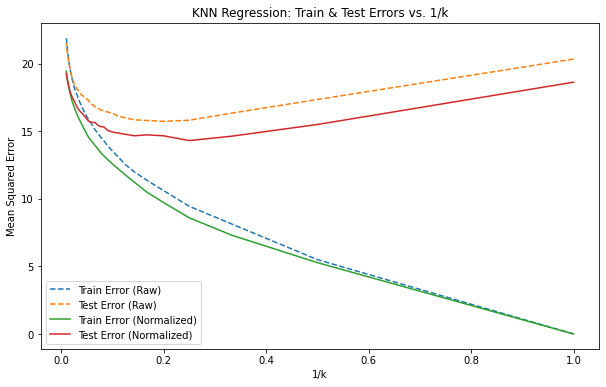

Best k Values for KNN Regression:

  Feature Type  Best k  Lowest Test MSE
0          Raw       5        15.726820
1   Normalized       4        14.305669


In [26]:
# part i
X = df[['T', 'V', 'AP', 'RH']].values
y = df['EP'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

k_values = range(1, 101)
train_errors_raw = []
test_errors_raw = []
train_errors_norm = []
test_errors_norm = []

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    
    knn_raw.fit(X_train, y_train)
    train_errors_raw.append(mean_squared_error(y_train, knn_raw.predict(X_train)))
    test_errors_raw.append(mean_squared_error(y_test, knn_raw.predict(X_test)))

    knn_norm.fit(X_train_norm, y_train)
    train_errors_norm.append(mean_squared_error(y_train, knn_norm.predict(X_train_norm)))
    test_errors_norm.append(mean_squared_error(y_test, knn_norm.predict(X_test_norm)))

# Convert k values to 1/k
inv_k_values = [1/k for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(inv_k_values, train_errors_raw, label="Train Error (Raw)", linestyle="dashed")
plt.plot(inv_k_values, test_errors_raw, label="Test Error (Raw)", linestyle="dashed")
plt.plot(inv_k_values, train_errors_norm, label="Train Error (Normalized)", linestyle="solid")
plt.plot(inv_k_values, test_errors_norm, label="Test Error (Normalized)", linestyle="solid")

plt.xlabel("1/k")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regression: Train & Test Errors vs. 1/k")
plt.legend()
plt.show()

best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_norm = k_values[np.argmin(test_errors_norm)]

best_k_results = pd.DataFrame({
    "Feature Type": ["Raw", "Normalized"],
    "Best k": [best_k_raw, best_k_norm],
    "Lowest Test MSE": [min(test_errors_raw), min(test_errors_norm)]
})

print("Best k Values for KNN Regression:\n")
print(best_k_results)

part (j)

In [27]:
#part j 
# Compare the best KNN regression model with the best linear regression model

best_knn = KNeighborsRegressor(n_neighbors=best_k_norm)
best_knn.fit(X_train_norm, y_train)
y_pred_knn = best_knn.predict(X_test_norm)
mse_knn_test = mean_squared_error(y_test, y_pred_knn)

best_linear_mse_test = min(mse_results["Test MSE"]) 

model_comparison = pd.DataFrame({
    "Model": ["Best KNN Regression", "Best Linear Regression"],
    "Test MSE": [mse_knn_test, best_linear_mse_test]
})

print("Comparison of KNN vs. Linear Regression (Based on Test MSE):\n")
print(model_comparison)

Comparison of KNN vs. Linear Regression (Based on Test MSE):

                    Model   Test MSE
0     Best KNN Regression  14.305669
1  Best Linear Regression  19.221019


In [28]:
print("KNN regression is the preferred model here due to its lower test error, indicating it captures the data patterns more effectively than linear regression.")
print("This suggests that the relationship between energy output (EP) and its predictors (T, V, AP, RH) is nonlinear.")

KNN regression is the preferred model here due to its lower test error, indicating it captures the data patterns more effectively than linear regression.
This suggests that the relationship between energy output (EP) and its predictors (T, V, AP, RH) is nonlinear.
